In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="APAC") & (data.business_area_name=="F00 - GCCT")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
59,F00 - GCCT,APAC,2017-01-01,1573939.21
81,F00 - GCCT,APAC,2017-02-01,1670235.21
105,F00 - GCCT,APAC,2017-03-01,1978194.47
120,F00 - GCCT,APAC,2017-04-01,1841356.77
151,F00 - GCCT,APAC,2017-05-01,1749495.03


,date,sales
0,2017-01-01,1573939.21
1,2017-02-01,1670235.21
2,2017-03-01,1978194.47
3,2017-04-01,1841356.77
4,2017-05-01,1749495.03


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

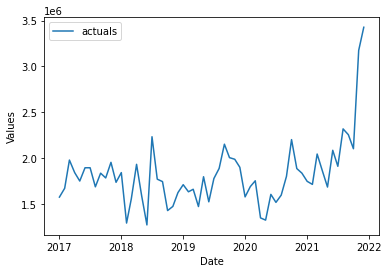

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

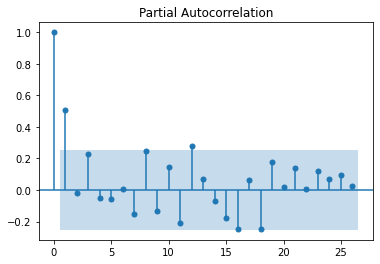

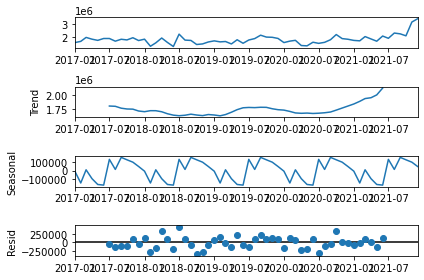

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
2/2 [==============================] - 67s 16s/step - loss: 0.4670 - val_loss: 0.3796
Epoch 2/200
2/2 [==============================] - 0s 214ms/step - loss: 0.4469 - val_loss: 0.3474
Epoch 3/200
2/2 [==============================] - 0s 204ms/step - loss: 0.4050 - val_loss: 0.2740
Epoch 4/200
2/2 [==============================] - 0s 214ms/step - loss: 0.3167 - val_loss: 0.1941
Epoch 5/200
2/2 [==============================] - 0s 196ms/step - loss: 0.2205 - val_loss: 0.3097
Epoch 6/200
2/2 [==============================] - 0s 188ms/step - loss: 0.2504 - val_loss: 0.1929
Epoch 7/200
2/2 [==============================] - 0s 185ms/step - loss: 0.1956 - val_loss: 0.1948
Epoch 8/200
2/2 [==============================] - 0s 191ms/step - loss: 0.2090 - val_loss: 0.2030
Epoch 9/200
2/2 [==============================] - 0s 180ms/step - loss: 0.2159 - val_loss: 0.2030
Epoch 10/200
2/2 [==============================] - 0s 194ms/step - loss: 0.2071 - val_loss: 0.2016
Epoch 11/2

2/2 [==============================] - 0s 175ms/step - loss: 0.1863 - val_loss: 0.2062
Epoch 84/200
2/2 [==============================] - 0s 158ms/step - loss: 0.1869 - val_loss: 0.2014
Epoch 85/200
2/2 [==============================] - 0s 173ms/step - loss: 0.1875 - val_loss: 0.2032
Epoch 86/200
2/2 [==============================] - 0s 164ms/step - loss: 0.1869 - val_loss: 0.2082
Epoch 87/200
2/2 [==============================] - 0s 163ms/step - loss: 0.1860 - val_loss: 0.2162
Epoch 88/200
2/2 [==============================] - 0s 166ms/step - loss: 0.1868 - val_loss: 0.2168
Epoch 89/200
2/2 [==============================] - 0s 175ms/step - loss: 0.1869 - val_loss: 0.2135
Epoch 90/200
2/2 [==============================] - 0s 162ms/step - loss: 0.1854 - val_loss: 0.2143
Epoch 91/200
2/2 [==============================] - 0s 168ms/step - loss: 0.1855 - val_loss: 0.2116
Epoch 92/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1860 - val_loss: 0.2058
Epoch 93/200


2/2 [==============================] - 0s 189ms/step - loss: 0.1908 - val_loss: 0.1824
Epoch 165/200
2/2 [==============================] - 0s 206ms/step - loss: 0.1913 - val_loss: 0.1858
Epoch 166/200
2/2 [==============================] - 0s 182ms/step - loss: 0.1890 - val_loss: 0.1954
Epoch 167/200
2/2 [==============================] - 0s 195ms/step - loss: 0.1875 - val_loss: 0.2183
Epoch 168/200
2/2 [==============================] - 0s 180ms/step - loss: 0.1905 - val_loss: 0.2227
Epoch 169/200
2/2 [==============================] - 0s 196ms/step - loss: 0.1892 - val_loss: 0.2060
Epoch 170/200
2/2 [==============================] - 0s 205ms/step - loss: 0.1864 - val_loss: 0.1990
Epoch 171/200
2/2 [==============================] - 0s 195ms/step - loss: 0.1883 - val_loss: 0.2017
Epoch 172/200
2/2 [==============================] - 0s 209ms/step - loss: 0.1883 - val_loss: 0.2079
Epoch 173/200
2/2 [==============================] - 0s 199ms/step - loss: 0.1874 - val_loss: 0.2144
Epoc

Epoch 46/200
2/2 [==============================] - 0s 196ms/step - loss: 0.0911 - val_loss: 0.1009
Epoch 47/200
2/2 [==============================] - 0s 214ms/step - loss: 0.0912 - val_loss: 0.1025
Epoch 48/200
2/2 [==============================] - 0s 192ms/step - loss: 0.0912 - val_loss: 0.1005
Epoch 49/200
2/2 [==============================] - 0s 194ms/step - loss: 0.0911 - val_loss: 0.0978
Epoch 50/200
2/2 [==============================] - 0s 218ms/step - loss: 0.0912 - val_loss: 0.0982
Epoch 51/200
2/2 [==============================] - 0s 195ms/step - loss: 0.0912 - val_loss: 0.1008
Epoch 52/200
2/2 [==============================] - 0s 203ms/step - loss: 0.0916 - val_loss: 0.1051
Epoch 53/200
2/2 [==============================] - 0s 199ms/step - loss: 0.0914 - val_loss: 0.1010
Epoch 54/200
2/2 [==============================] - 0s 199ms/step - loss: 0.0912 - val_loss: 0.0973
Epoch 55/200
2/2 [==============================] - 0s 224ms/step - loss: 0.0914 - val_loss: 0.0969


2/2 [==============================] - 0s 194ms/step - loss: 0.0914 - val_loss: 0.0958
Epoch 128/200
2/2 [==============================] - 0s 201ms/step - loss: 0.0912 - val_loss: 0.0986
Epoch 129/200
2/2 [==============================] - 0s 208ms/step - loss: 0.0912 - val_loss: 0.1022
Epoch 130/200
2/2 [==============================] - 0s 193ms/step - loss: 0.0913 - val_loss: 0.1069
Epoch 131/200
2/2 [==============================] - 0s 209ms/step - loss: 0.0916 - val_loss: 0.1011
Epoch 132/200
2/2 [==============================] - 0s 190ms/step - loss: 0.0915 - val_loss: 0.0974
Epoch 133/200
2/2 [==============================] - 0s 203ms/step - loss: 0.0914 - val_loss: 0.0998
Epoch 134/200
2/2 [==============================] - 0s 216ms/step - loss: 0.0911 - val_loss: 0.0984
Epoch 135/200
2/2 [==============================] - 0s 195ms/step - loss: 0.0911 - val_loss: 0.0975
Epoch 136/200
2/2 [==============================] - 0s 202ms/step - loss: 0.0914 - val_loss: 0.0975
Epoc

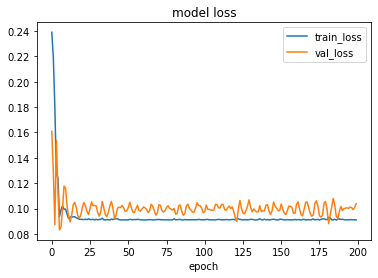

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

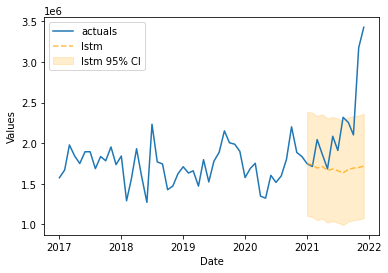

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

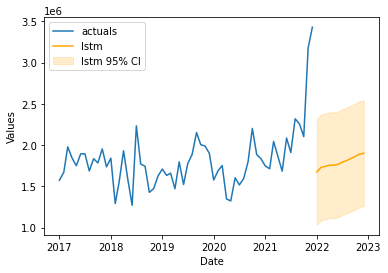

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.19,732330.62,-0.88,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2387047.33,1745902.23,1746231.64,1104757.13,lstm,0.95
1,2021-02-01,2373215.24,1732070.14,1712798.92,1090925.03,lstm,0.95
2,2021-03-01,2334563.00,1693417.90,2044051.68,1052272.80,lstm,0.95
3,2021-04-01,2353852.89,1712707.78,1859219.30,1071562.68,lstm,0.95
4,2021-05-01,2304453.77,1663308.67,1683795.37,1022163.57,lstm,0.95
5,2021-06-01,2322971.94,1681826.84,2084866.34,1040681.73,lstm,0.95
6,2021-07-01,2301867.24,1660722.14,1910132.23,1019577.04,lstm,0.95
7,2021-08-01,2275403.67,1634258.56,2318354.49,993113.46,lstm,0.95
8,2021-09-01,2317278.48,1676133.38,2255031.69,1034988.28,lstm,0.95
9,2021-10-01,2333751.33,1692606.23,2101981.01,1051461.13,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,2314729.32,1673584.21,1032439.11,lstm,0.95
1,2022-02-01,2369786.30,1728641.19,1087496.09,lstm,0.95
2,2022-03-01,2382414.45,1741269.34,1100124.24,lstm,0.95
3,2022-04-01,2396576.10,1755430.99,1114285.89,lstm,0.95
4,2022-05-01,2397001.37,1755856.27,1114711.16,lstm,0.95
5,2022-06-01,2407327.47,1766182.37,1125037.26,lstm,0.95
6,2022-07-01,2432729.47,1791584.37,1150439.26,lstm,0.95
7,2022-08-01,2452969.93,1811824.83,1170679.72,lstm,0.95
8,2022-09-01,2477407.83,1836262.72,1195117.62,lstm,0.95
9,2022-10-01,2502828.76,1861683.66,1220538.55,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:26319086.494547002
Total_2022:21514354.30632718
YOY (growth):-18.255695117743944
